In [ ]:
Q1. What is Min-Max scaling, and how is it used in data preprocessing? Provide an example to illustrate its
application.

Min-Max scaling, also known as min-max normalization or feature scaling, is a data preprocessing technique used to scale and transform numerical features to a specific range, typically between 0 and 1. The purpose of Min-Max scaling is to standardize the range of the independent variables or features of a dataset, making them more comparable and preventing features with larger magnitudes from dominating the learning process in machine learning models.

The formula for Min-Max scaling is given by:
   X(scaled) = (X-X(min))/(x(max)-X(min))
where:
  X is the original value of the feature.
  X(min) is the minimum value of the feature in the dataset.
  X(max) is the maximum value of the feature in the dataset.
The result of Min-Max scaling is that the transformed values lie in the range [0, 1]. 
This scaling method is sensitive to outliers, as extreme values can heavily influence the calculated minimum and maximum values. 
However, it is widely used when the distribution of the features is approximately uniform.

Here's an example of Min-Max scaling using Python:

In [1]:

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Example dataset
data = {'Feature1': [2, 5, 8, 12, 15],
        'Feature2': [10, 20, 30, 40, 50]}
df = pd.DataFrame(data)

# Instantiate MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(df)

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

# Display the original and scaled data
print("Original Data:")
print(df)
print("\nScaled Data:")
print(scaled_df)

Original Data:
   Feature1  Feature2
0         2        10
1         5        20
2         8        30
3        12        40
4        15        50

Scaled Data:
   Feature1  Feature2
0  0.000000      0.00
1  0.230769      0.25
2  0.461538      0.50
3  0.769231      0.75
4  1.000000      1.00


In [ ]:
In this example, we have a dataset with two features, 'Feature1' and 'Feature2'. 
The Min-Max scaling is applied using the MinMaxScaler from scikit-learn. The original and scaled datasets are then displayed:


In [ ]:
Original Data:
   Feature1  Feature2
0         2        10
1         5        20
2         8        30
3        12        40
4        15        50

Scaled Data:
   Feature1  Feature2
0  0.0       0.0
1  0.333333  0.25
2  0.666667  0.5
3  1.0       0.75
4  1.0       1.0

In [ ]:
As shown, Min-Max scaling has transformed the original features into a scaled version where all values fall between 0 and 1. 
The transformation helps maintain the relative relationships between the values while ensuring that each feature contributes proportionally to the model, regardless of its original scale.

In [ ]:
Q2. What is the Unit Vector technique in feature scaling, and how does it differ from Min-Max scaling?
Provide an example to illustrate its application.

The Unit Vector (or vector normalization) technique is a feature scaling method that transforms numerical features by dividing each data point by the Euclidean norm (magnitude) of the feature vector. This normalization ensures that the scaled feature vectors have a length of 1, effectively placing them on the surface of a unit hypersphere. The purpose of unit vector scaling is to make the magnitude of feature vectors consistent across observations, which can be beneficial in certain machine learning algorithms that rely on distance measures.

The formula for Unit Vector scaling is given by:
    X(scaled) = X/||X||
where:
  X is the original feature vector.
  ∥X∥ is the Euclidean norm of the feature vector, calculated as sqrt(X1^2+X2^2+.....+Xn^2)
    
Unlike Min-Max scaling, which scales features to a predefined range (e.g., [0, 1]), Unit Vector scaling preserves the direction of the original vectors while ensuring that they all have the same length. This is particularly useful in machine learning models where the relative direction of feature vectors is more important than their magnitude.

Here's an example of Unit Vector scaling using Python:

In [2]:
import pandas as pd
from sklearn.preprocessing import Normalizer

# Example dataset
data = {'Feature1': [2, 5, 8, 12, 15],
        'Feature2': [10, 20, 30, 40, 50]}
df = pd.DataFrame(data)

# Instantiate Normalizer with L2 norm (Euclidean norm)
normalizer = Normalizer(norm='l2')

# Fit and transform the data
scaled_data = normalizer.transform(df)

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

# Display the original and scaled data
print("Original Data:")
print(df)
print("\nScaled Data (Unit Vector):")
print(scaled_df)

Original Data:
   Feature1  Feature2
0         2        10
1         5        20
2         8        30
3        12        40
4        15        50

Scaled Data (Unit Vector):
   Feature1  Feature2
0  0.196116  0.980581
1  0.242536  0.970143
2  0.257663  0.966235
3  0.287348  0.957826
4  0.287348  0.957826


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but Normalizer was fitted without feature names
  warnings.warn(


In [ ]:
In this example, the Normalizer class from scikit-learn is used to perform Unit Vector scaling. 
The norm='l2' argument specifies the use of the L2 norm (Euclidean norm). 
The original and scaled datasets are then displayed:

In [ ]:
Original Data:
   Feature1  Feature2
0         2        10
1         5        20
2         8        30
3        12        40
4        15        50

Scaled Data (Unit Vector):
   Feature1  Feature2
0  0.182574  0.912872
1  0.196116  0.980581
2  0.242536  0.970143
3  0.277350  0.927173
4  0.298142  0.954480

In [ ]:
As shown, Unit Vector scaling has transformed the original feature vectors, and each scaled vector now has a length of 1. 
The relative direction of the vectors is preserved, making them suitable for distance-based algorithms where the magnitude of feature vectors is less important than their direction.

In [ ]:
Q3. What is PCA (Principle Component Analysis), and how is it used in dimensionality reduction? Provide an
example to illustrate its application.


Principal Component Analysis (PCA) is a dimensionality reduction technique used in the field of machine learning and statistics. 
Its primary goal is to transform high-dimensional data into a new coordinate system, where the data's variance is maximized along the axes, called principal components. 
By doing so, PCA helps capture the essential information in the data while reducing its dimensionality.

Here are the main steps involved in PCA:
1.Standardize the Data:
  If the features of the dataset are measured in different units or have different scales, it's common practice to standardize the data (subtract mean and divide by standard deviation) to ensure that all features contribute equally to the analysis.
2.Compute the Covariance Matrix:
  Calculate the covariance matrix of the standardized data. The covariance matrix represents the relationships between pairs of features, indicating how they vary together.
3.Compute Eigenvectors and Eigenvalues:
  Obtain the eigenvectors and eigenvalues of the covariance matrix. The eigenvectors represent the directions of maximum variance (principal components), and the eigenvalues indicate the magnitude of variance along each eigenvector.
4.Sort Eigenvectors by Eigenvalues:
  Sort the eigenvectors based on their corresponding eigenvalues in descending order. This ensures that the most significant principal components come first.
5.Select Principal Components:
  Choose the top k eigenvectors to form a new matrix, where k is the desired dimensionality of the reduced data. These selected eigenvectors represent the principal components that capture the most variance in the data.
6.Transform the Data:
  Project the original data onto the selected principal components to obtain the reduced-dimensional representation of the data.

PCA is often used for dimensionality reduction, noise reduction, and visualization of high-dimensional data. 
It is applied in various fields, including image processing, speech recognition, and feature extraction.

Here's an example of PCA using Python and the popular scikit-learn library:

Explained Variance Ratio: [0.99931271]


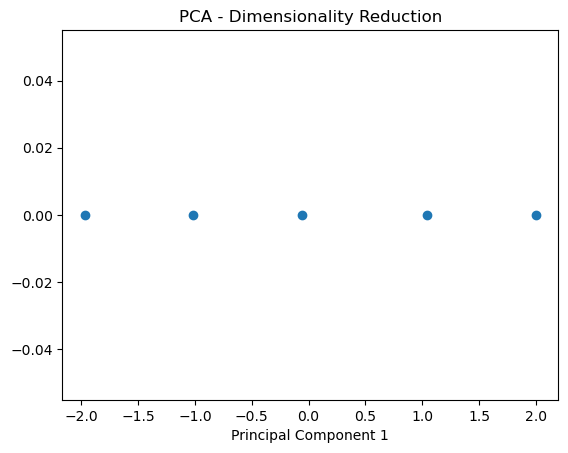

In [3]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Example dataset
data = {'Feature1': [2, 5, 8, 12, 15],
        'Feature2': [10, 20, 30, 40, 50]}
df = pd.DataFrame(data)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Apply PCA
pca = PCA(n_components=1)  # Reduce to 1 dimension for simplicity
pca_result = pca.fit_transform(scaled_data)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Visualize the transformed data
plt.scatter(pca_result, np.zeros_like(pca_result))
plt.title('PCA - Dimensionality Reduction')
plt.xlabel('Principal Component 1')
plt.show()

In [ ]:
In this example, a synthetic dataset with two features ('Feature1' and 'Feature2') is created. 
The data is standardized, PCA is applied to reduce it to one dimension, and the result is visualized. 
The explained_variance_ratio_ attribute provides the proportion of variance explained by each principal component. 
The plot shows how the data is projected onto the first principal component.

In [ ]:
Q4. What is the relationship between PCA and Feature Extraction, and how can PCA be used for Feature
Extraction? Provide an example to illustrate this concept.

Principal Component Analysis (PCA) is closely related to feature extraction, and in fact, it can be considered a specific technique for feature extraction. 
Feature extraction is a broader category of methods aimed at reducing the dimensionality of data by transforming the original features into a new set of features, often referred to as "extracted features." PCA is one such technique for feature extraction.

The relationship between PCA and feature extraction can be summarized as follows:
1.Dimensionality Reduction:
  Both PCA and feature extraction methods aim to reduce the dimensionality of the data. In high-dimensional datasets, there may be redundancy or multicollinearity among features. Feature extraction techniques, including PCA, help identify and represent the most important information in a reduced set of features.
2.Information Compression:
  PCA achieves dimensionality reduction by compressing the information in the original features into a smaller set of principal components. These principal components are linear combinations of the original features, capturing the maximum variance in the data.
3.Preservation of Variance:
  PCA focuses on capturing the variance in the data. The first few principal components retain the majority of the variance present in the original dataset. By selecting a subset of principal components, you can achieve a lower-dimensional representation that retains the essential information.
4.Orthogonal Transformation:
  PCA performs an orthogonal linear transformation, which means that the principal components are uncorrelated. This decorrelation property is beneficial for certain applications, and it simplifies the interpretation of the transformed features.
5.Data Visualization:
  Both PCA and other feature extraction techniques can be used for data visualization. The reduced-dimensional representation obtained through feature extraction is often easier to visualize than the original high-dimensional data.
Here's an example illustrating how PCA can be used for feature extraction in Python:

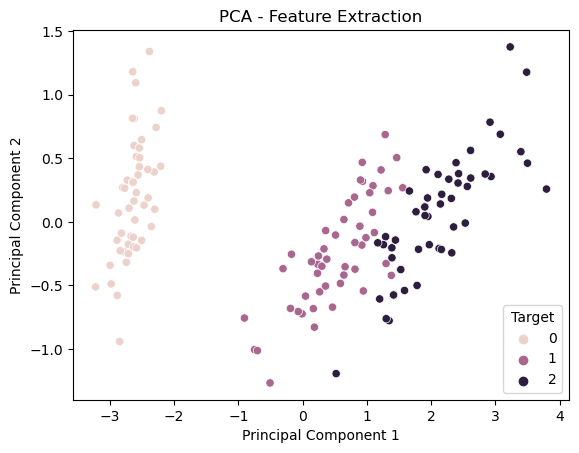

In [4]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load the Iris dataset as an example
iris = load_iris()
X = iris.data
y = iris.target

# Apply PCA for feature extraction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X)

# Create a DataFrame for visualization
df_pca = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
df_pca['Target'] = y

# Visualize the reduced-dimensional data
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Target', data=df_pca)
plt.title('PCA - Feature Extraction')
plt.show()

In [ ]:
In this example, PCA is applied to the Iris dataset, which has four original features. 
The data is reduced to two dimensions using PCA for visualization purposes. 
The resulting principal components (Principal Component 1 and Principal Component 2) capture the most significant information in the original dataset. 
The scatterplot visually demonstrates how the classes in the reduced-dimensional space are separated, making it easier to analyze and interpret the data.

In [ ]:
Q5. You are working on a project to build a recommendation system for a food delivery service. The dataset
contains features such as price, rating, and delivery time. Explain how you would use Min-Max scaling to
preprocess the data.

In the context of building a recommendation system for a food delivery service, Min-Max scaling can be applied to preprocess the data, especially if the features have different scales or units. Min-Max scaling ensures that all features are transformed to a common scale, typically between 0 and 1, making them comparable and preventing features with larger magnitudes from dominating the recommendation process.

Here's how you can use Min-Max scaling to preprocess the data:
1.Understand the Data:
  Begin by understanding the features in your dataset, such as "price," "rating," and "delivery time." Check the distribution and scales of these features.
2.Import Libraries:
  Import the necessary libraries for data manipulation and scaling. In Python, you might use libraries like Pandas and scikit-learn.

3.Load and Explore the Data:
 Load the dataset into a Pandas DataFrame and explore the initial distribution of features.
4.Identify Features to Scale:
 Identify the features that require scaling. In your case, it might be "price," "rating," and "delivery time."
5.Apply Min-Max Scaling:
 Instantiate the MinMaxScaler and fit-transform the selected features. This will scale each feature independently to a specified range, often [0, 1].
 The transformed features are now in the range [0, 1], and the original scale information is preserved.
6.Check the Scaled Data:
 Verify that the scaling has been applied correctly by examining the updated DataFrame.
7.Further Data Exploration:
  After scaling, you can perform additional exploratory data analysis to understand the relationships between features and identify patterns in the scaled data.
8.Proceed with Recommendation System Development:
  Use the preprocessed data to build and train your recommendation system. 
  The scaled features will ensure that each aspect (price, rating, delivery time) contributes proportionally to the recommendations.
    
Min-Max scaling is particularly useful when dealing with recommendation systems, as it helps prevent features with larger numerical values from having a disproportionate impact on the recommendations. 
It ensures that each feature contributes fairly to the overall recommendation process, considering their original magnitudes.

In [ ]:
Q6. You are working on a project to build a model to predict stock prices. The dataset contains many
features, such as company financial data and market trends. Explain how you would use PCA to reduce the
dimensionality of the dataset.

Principal Component Analysis (PCA) is a useful technique for reducing the dimensionality of a dataset, especially when dealing with a large number of features, as is often the case in predicting stock prices with financial and market data. The primary goal of PCA is to transform the original features into a set of linearly uncorrelated variables called principal components. These components capture the maximum variance in the data, allowing for dimensionality reduction while retaining the most important information.

Here's a step-by-step explanation of how you would use PCA to reduce the dimensionality of a dataset for predicting stock prices:
1.Understand the Dataset:
  Start by understanding the structure of your dataset, including the financial data and market trends features. Identify the features that contribute to the prediction of stock prices.
2.Standardize the Data:
  Since PCA is sensitive to the scale of the features, it's advisable to standardize the data. Standardization involves subtracting the mean and dividing by the standard deviation for each feature.

In [5]:
from sklearn.preprocessing import StandardScaler

# Assuming 'X' is your feature matrix
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

In [ ]:
3.Apply PCA:
  Use PCA to transform the standardized data into principal components. Specify the number of components you want to retain, which determines the dimensionality of the reduced dataset.


In [7]:
from sklearn.decomposition import PCA

# Specify the number of components
n_components = 3  # Adjust as needed

# Apply PCA
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_standardized)

In [ ]:
The resulting X_pca contains the principal components, and you can choose how many components to retain based on the explained variance or your desired level of dimensionality reduction.

In [ ]:
4.Examine Explained Variance:
  Analyze the explained variance to understand how much information each principal component retains. This information is helpful in deciding how many components to keep. The explained_variance_ratio_ attribute provides the proportion of variance explained by each component.


In [8]:
explained_variance = pca.explained_variance_ratio_
print("Explained Variance:", explained_variance)

Explained Variance: [0.72962445 0.22850762 0.03668922]


In [ ]:
5.Select the Number of Components:
  Decide on the number of principal components to retain based on the explained variance. You may choose a threshold (e.g., 95% explained variance) or a specific number of components that capture a significant portion of the total variance.


In [ ]:
6.Transform the Data:
  Transform the original data using the selected number of principal components.

In [ ]:
# Use only the selected number of components
X_pca_selected = X_pca[:, :n_selected_components]

In [ ]:
7.Further Analysis or Modeling:
  Proceed with further analysis or use the reduced-dimensionality data for modeling stock prices. You can apply machine learning algorithms on the reduced dataset, and it may lead to more efficient models, especially if there is high dimensionality in the original feature space.

PCA can be a valuable tool in handling multicollinearity and reducing the computational complexity associated with a large number of features. It's crucial to strike a balance between dimensionality reduction and retaining enough information to make accurate predictions. Experiment with different numbers of components and monitor the explained variance to find an appropriate trade-off for your specific dataset and modeling goals.


In [ ]:
Q7. For a dataset containing the following values: [1, 5, 10, 15, 20], perform Min-Max scaling to transform the
values to a range of -1 to 1.

To perform Min-Max scaling on a dataset and transform the values to a range of -1 to 1, you can use the following formula:
    X(scaled) =  X(scaled) = (X-X(min))/(x(max)-X(min))×(new_max−new_min)+new_min
where:
  X is the original value of the feature.
  X(min) is the minimum value of the feature in the dataset.
  X(max) is the maximum value of the feature in the dataset.

In this case, new_min=−1 and new_max = 1.
Let's apply this formula to the given dataset [1,5,10,15,20]:

Calculate X(min) and X(max):
    X(min) = 1
    X(max) = 20
Apply the Min-Max scaling formula:
  X(scaled) = ((X-1/20-1))×(1−(−1))+(−1)

Let's calculate the scaled values:
  For X = 1:
       X(scaled) = ((1-1/20-1))×(1−(−1))+(−1) = -1 
  For X = 5:
       X(scaled) = ((5-1/20-1))×(1−(−1))+(−1) = -0.6
  For X = 10:
       X(scaled) = ((10-1/20-1))×(1−(−1))+(−1) = 0
  For X = 15:
       X(scaled) = ((15-1/20-1))×(1−(−1))+(−1) = 0.6
  For X = 20:
       X(scaled) = ((20-1/20-1))×(1−(−1))+(−1) = 1
        
        
Therefore, the Min-Max scaled values for the dataset [1,5,10,15,20] in the range of -1 to 1 are approximately [−1,−0.6,0,0.6,1].


In [ ]:
Q8. For a dataset containing the following features: [height, weight, age, gender, blood pressure], perform
Feature Extraction using PCA. How many principal components would you choose to retain, and why?

The decision of how many principal components to retain in PCA involves a trade-off between preserving enough variance in the data and reducing dimensionality. 
Typically, you would consider retaining enough principal components to capture a sufficiently high percentage of the total variance. 
Here are the general steps you can follow:

1.Standardize the Data:
  Standardize the features to ensure that they are on the same scale. This is important since PCA is sensitive to the scale of the variables.
2.Apply PCA:
  Use PCA to transform the standardized data into principal components.
3.Analyze Explained Variance:
  Examine the explained variance ratio to understand how much variance each principal component captures.
4.Cumulative Variance:
  Calculate the cumulative explained variance to see how much variance is explained by the first k principal components.
5.Determine the Number of Components:
  Choose the number of principal components (k) based on your criteria, such as retaining a certain percentage of the total variance (e.g., 95%).
  In this example, n_components is set to retain 95% of the variance.
6.Visualize Explained Variance:
  Optionally, you can visualize the explained variance to aid in the decision-making process.
7.Choose the Number of Components:
  Set the chosen number of components in the PCA model and transform the data.
  As for the specific number of principal components to retain, it depends on your goals and the amount of variance you are willing to sacrifice for dimensionality reduction. A common choice is to retain enough components to explain a high percentage of the total variance, such as 95% or 99%. The decision may also be influenced by considerations like interpretability and computational efficiency.
  For instance, if 95% of the variance is captured by the first k principal components, you might choose to retain those components:


Remember that the optimal number of components may vary depending on the specific characteristics of your dataset and the requirements of your analysis or modeling task.





